In [24]:
import numpy as np
import pandas as pd
import os
import re
import csv
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pyfftw
from math import sqrt

## Data prep ##

In [ ]:
#####extracting velocity(ux, uy)#####

base_path = "../2D_Decay"

all_folders = os.listdir(base_path)

numeric_folders = sorted(
    [folder for folder in all_folders if folder.replace('.', '').isdigit()],
    key=lambda x: float(x)
)

output_dir = "../processed_data"
os.makedirs(output_dir, exist_ok=True)

for folder in numeric_folders:
    folder_path = os.path.join(base_path, folder)
    if os.path.isdir(folder_path):
        u_file_path = os.path.join(folder_path, "U")
        if os.path.isfile(u_file_path):
            print(f"Processing file: {u_file_path}")
            with open(u_file_path, 'r') as file:
                lines = file.readlines()
                data = []
                in_data_section = False

                for line in lines:
                    line = line.strip()
                    if line.startswith("internalField"):
                        in_data_section = True
                        continue
                    if in_data_section:
                        if line.startswith(")"):
                            break
                        # 정규식으로 ux, uy 값 추출
                        match = re.match(r"\(([-\d.eE+]+) ([-\d.eE+]+) [-\d.eE+]+\)", line)
                        if match:
                            ux = float(match.group(1))
                            uy = float(match.group(2))
                            data.append((ux, uy))

                if data:
                    csv_file = os.path.join(output_dir, f"{folder}_ux_uy_data.txt")
                    with open(csv_file, "w", newline="") as csvfile:
                        writer = csv.writer(csvfile)
                        writer.writerow(["ux", "uy"])
                        writer.writerows(data)
                    print(f"Saved {len(data)} entries for folder {folder} to {csv_file}")
                else:
                    print(f"No vector data found in {u_file_path}.")

def load_csv_data(folder_name):
    csv_file = os.path.join(output_dir, f"{folder_name}_ux_uy_data.txt")
    if os.path.isfile(csv_file):
        try:
            data = np.loadtxt(csv_file, delimiter=",", skiprows=1)
            if data.ndim == 1:  # 1차원 배열 처리
                data = data.reshape(-1, 2)
            return data
        except ValueError:
            print(f"No valid data in file: {csv_file}")
            return None
    else:
        print(f"No data file found for folder: {folder_name}")
        return None

folder_to_process = "0.2"
data = load_csv_data(folder_to_process)
if data is not None and len(data) > 0:
    print(f"Loaded {len(data)} entries from folder {folder_to_process}")
    avg_ux = np.mean(data[:, 0])
    avg_uy = np.mean(data[:, 1])
    print(f"Average ux: {avg_ux:.6f}, uy: {avg_uy:.6f}")
else:
    print(f"No data available for folder {folder_to_process}.")


In [ ]:
#####extracting vorticity######

base_path = "../2D_Decay"
all_folders = os.listdir(base_path)

numeric_folders = sorted(
    [folder for folder in all_folders if folder.replace('.', '').isdigit()],
    key=lambda x: float(x)
)

output_dir = "../proceed_data_vor/proceed_data_v_given/processed_data_vor"
os.makedirs(output_dir, exist_ok=True)

for folder in numeric_folders:
    folder_path = os.path.join(base_path, folder)
    if os.path.isdir(folder_path):
        u_file_path = os.path.join(folder_path, "vorticity")
        if os.path.isfile(u_file_path):
            with open(u_file_path, 'r') as file:
                lines = file.readlines()
                vorticity_data = []
                in_data_section = False

                for line in lines:
                    line = line.strip()
                    if line.startswith("internalField"):
                        in_data_section = True
                        continue
                    if in_data_section:
                        if line.startswith(")"):
                            break
                        match = re.match(r"\([\d\-eE.+]+ [\d\-eE.+]+ ([\d\-eE.+]+)\)", line)
                        if match:
                            vorticity = float(match.group(1))  # 3번째 열 추출(z축만 추출)
                            vorticity_data.append(vorticity)

                csv_file = os.path.join(output_dir, f"{folder}_vor_data.txt")
                with open(csv_file, "w", newline="") as csvfile:
                    writer = csv.writer(csvfile)
                    writer.writerow(["vorticity"])
                    writer.writerows([[value] for value in vorticity_data])
                print(f"Saved {len(vorticity_data)} entries for folder {folder} to {csv_file}")

def load_csv_data(folder_name):
    csv_file = os.path.join(output_dir, f"{folder_name}_vor_data.txt")
    if os.path.isfile(csv_file):
        data = np.loadtxt(csv_file, delimiter=",", skiprows=1)
        return data
    else:
        print(f"No data file found for folder: {folder_name}")
        return None

folder_to_process = "0.2"
vor_data = load_csv_data(folder_to_process)
if vor_data is not None:
    print(f"Loaded {len(vor_data)} entries from folder {folder_to_process}")
    print(f"Average vorticity: {np.mean(vor_data):.6f}")


## declare file path ##

In [123]:
files = [
    '../proceed_data/proceed_data_v_given/processed_data_u/0_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/5_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/15_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/20_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/25_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/35_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/40_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/45_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/50_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/70_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/90_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/110_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/130_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/150_ux_uy_data.txt',
    
]
files2 = [
    '../proceed_data/proceed_data_v_10/processed_data_u/0_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/5_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/15_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/20_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/25_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/35_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/40_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/45_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/50_ux_uy_data.txt',
]


files_vor = [
    '../proceed_data/proceed_data_v_given/processed_data_vor/0.2_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/5_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/15_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/20_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/25_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/35_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/40_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/45_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/50_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/70_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/90_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/110_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/130_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/150_vor_data.txt',
    
]

files2_vor = [
    '../proceed_data/proceed_data_v_10/processed_data_vor/0.2_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/5_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/15_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/20_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/25_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/35_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/40_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/45_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/50_vor_data.txt',
]

files3 = [
    '../proceed_data/proceed_data_v_half/processed_data_u/0_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/5_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/15_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/20_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/25_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/35_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/40_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/45_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/50_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/70_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/90_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/110_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/130_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/150_ux_uy_data.txt',
    # '../proceed_data/proceed_data_v_half/processed_data_u/170_ux_uy_data.txt',
    # '../proceed_data/proceed_data_v_half/processed_data_u/186_ux_uy_data.txt',
]

files3_vor = [
    '../proceed_data/proceed_data_v_half/processed_data_vor/0.2_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/5_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/15_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/20_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/25_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/35_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/40_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/45_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/50_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/70_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/90_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/110_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/130_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/150_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/170_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/186_vor_data.txt',
]


## separating ux, uy ##

In [102]:
def sep(data):
    df = pd.read_csv(data)
    ux = df['ux'].values
    uy = df['uy'].values
    
    return ux, uy
    
def resizing(ux, uy):
    N = 1024
    ux_2d = ux.reshape((N, N))
    uy_2d = uy.reshape((N, N))
    return ux_2d, uy_2d

## Function of Loading vorticity and E_K Plotting ##

In [126]:
def get_ek(file):
    ux, uy = sep(file)
    ux,uy = resizing(ux, uy)
    k, e_k = ek(ux, uy, 1024)
    return k, e_k

def get_vorticity(file):
    
    data = pd.read_csv(file, header=0).values.flatten()
    data = data[~np.isnan(data)]
    data = data[0:1024 * 1024]
    label = file.split('/')[-1].split('_')[0]
    
    return data, label

def velocity_plotting(file):
    
    ux, uy = sep(file)
    label = file.split('/')[-1].split('_')[0]
    ux_2d = ux.reshape((N, N))
    uy_2d = uy.reshape((N, N))
    k_array, Ek_array = ek(ux_2d, uy_2d, 1024)
    Ek_array[0] = 10e-21
    label = file.split('/')[-1].split('_')[0]
    plt.loglog(k_array, Ek_array, label=f"{label}s")    

def compared_line():
    k_a = np.logspace(0, 1, 500)
    E_k_a = ((k_a)**-(5/3)) * 10e-1
    plt.loglog(k_a, E_k_a, linestyle='--', color='red', label="E(k) = k^-5/3")
    k_a_shift = k_a * 10
    E_k_a_2 = ((k_a)**-4) * 10e-3
    plt.loglog(k_a_shift, E_k_a_2, linestyle='--', color='black', label="E(k) = k^-4")

## Energy Spectrum Function ##

In [27]:
import numpy as np

def ek(u, v, n_bins):
    """
    2π x 2π 정사각형 도메인에서 측정된 2D 속도장 u(x,y), v(x,y)로부터
    등방성 에너지 스펙트럼 E(k)를 계산하는 함수.
    
    Parameters
    ----------
    u, v : 2D numpy array
        (Ny, Nx) 형태의 속도장.
        도메인: x, y ∈ [0, 2π).
    n_bins : int, optional
        파수 k를 구간으로 나눠 스펙트럼을 계산할 때의 bin 수. 기본 50.

    Returns
    -------
    k_vals : 1D numpy array
        각 쉘(bin)의 중심 파수값
    E_k : 1D numpy array
        해당 파수에서의 등방성 에너지 스펙트럼 (단순 쉘 합)
    
    Note
    ----
    - E(k)에 대한 엄밀한 정규화(예: 2πk로 나누는 등)는 정의에 따라 추가로 할 수 있음.
    - 실제 난류 해석 시, 시간평균/앙상블평균, 윈도잉(windowing) 등 보정이 필요할 수 있음.
    """
    
    # -----------------------------
    # 1) 격자 및 도메인 파라미터
    # -----------------------------
    Ny, Nx = u.shape
    # 도메인 크기는 2π x 2π로 고정
    Lx = 2.0 * np.pi
    Ly = 2.0 * np.pi
    
    # 격자 간격
    dx = Lx / Nx
    dy = Ly / Ny
    
    # -----------------------------
    # 2) 평균 제거 (원하면 생략 가능)
    # -----------------------------
    u_prime = u - np.mean(u)
    v_prime = v - np.mean(v)
    
    # -----------------------------
    # 3) 2D FFT 및 파워 스펙트럼
    # -----------------------------
    U_hat = np.fft.fft2(u_prime)
    V_hat = np.fft.fft2(v_prime)
    
    # 파워 스펙트럼
    # (보통 (Nx*Ny)^2 등으로 나누어줘야 실제 에너지 보존 형태와 대응)
    PS = (np.abs(U_hat)**2 + np.abs(V_hat)**2) / (Nx * Ny)**2
    
    # -----------------------------
    # 4) 파수좌표 (kx, ky) 계산
    # -----------------------------
    # np.fft.fftfreq(N, d=샘플간격) => 파수 축이 [-kmax/2 .. kmax/2)로 생성
    kx = 2.0*np.pi * np.fft.fftfreq(Nx, d=dx)
    ky = 2.0*np.pi * np.fft.fftfreq(Ny, d=dy)
    
    # 2D 파수 그리드
    KX, KY = np.meshgrid(kx, ky)
    
    # 파수 크기
    K_mag = np.sqrt(KX**2 + KY**2)
    
    # -----------------------------
    # 5) 등방성 가정 → 동심원 쉘 적분
    # -----------------------------
    k_max = K_mag.max()
    
    # k 범위를 n_bins 등분
    bins = np.linspace(0, k_max, n_bins+1)
    
    E_k = np.zeros(n_bins)
    k_vals = np.zeros(n_bins)
    
    for i in range(n_bins):
        k_min = bins[i]
        k_max_ = bins[i+1]
        
        # 이 구간(쉘)에 속하는 격점 마스크
        mask = (K_mag >= k_min) & (K_mag < k_max_)
        
        # 쉘 내부 파워 스펙트럼 합
        shell_sum = np.sum(PS[mask])
        
        # 쉘 중심 파수값
        k_mid = 0.5*(k_min + k_max_)
        
        E_k[i] = shell_sum
        k_vals[i] = k_mid
    
    # (선택) 아래와 같이 2πk로 나누면 '단위 k 간격당 분포' 형태가 됨.
    # for i in range(n_bins):
    #     if k_vals[i] > 0:
    #         E_k[i] /= (2.0 * np.pi * k_vals[i])
    
    return k_vals, E_k

In [28]:
def compute_spectrum(u_data):
    grid_size = 1024
    ux = u_data.reshape((grid_size, grid_size))
    
    ux_fft = np.fft.fftn(ux)
    energy_density = 0.5 * (np.abs(ux_fft)**2)
    
    kx = np.fft.fftfreq(grid_size) * grid_size
    #ky = np.fft.fftfreq(grid_size) * grid_size
    k = np.sqrt(kx[:, None]**2)
    
    k_bins = np.arange(-10, k.max(), 1)
    k_spectrum = np.zeros(len(k_bins) - 1)
    
    for i in range(len(k_bins) - 1):
        mask = (k >= k_bins[i]) & (k < k_bins[i+1])
        if np.any(mask):
            k_spectrum[i] = energy_density[mask].mean()
    
    return k_bins[:-1], k_spectrum

In [29]:
# compute the energy spectrum numerically using vorticity
def ensp(nx,ny,w):
    
    '''
    Computation of energy spectrum and maximum wavenumber from vorticity field
    
    Inputs
    ------
    nx,ny : number of grid points in x and y direction
    w : vorticity field in physical spce (including periodic boundaries)
    
    Output
    ------
    en : energy spectrum computed from vorticity field
    n : maximum wavenumber
    '''
    w = data.reshape(1024, 1024)
    dx = 6.283/1024
    
    epsilon = 1.0e-6

    kx = np.empty(nx)
    ky = np.empty(ny)
    
    kx[0:int(nx/2)] = 2*np.pi/(np.float64(nx)*dx)*np.float64(np.arange(0,int(nx/2)))
    kx[int(nx/2):nx] = 2*np.pi/(np.float64(nx)*dx)*np.float64(np.arange(-int(nx/2),0))

    ky[0:ny] = kx[0:ny]
    
    kx[0] = epsilon
    ky[0] = epsilon

    kx, ky = np.meshgrid(kx, ky, indexing='ij')
    
    a = pyfftw.empty_aligned((nx,ny),dtype= 'complex128')
    b = pyfftw.empty_aligned((nx,ny),dtype= 'complex128')

    fft_object = pyfftw.FFTW(a, b, axes = (0,1), direction = 'FFTW_FORWARD')
    wf = fft_object(w[0:nx,0:ny]) 
    
    es =  np.empty((nx,ny))
    
    kk = np.sqrt(kx[:,:]**2 + ky[:,:]**2)
    es[:,:] = np.pi*((np.abs(wf[:,:])/(nx*ny))**2)/kk
    
    n = int(np.sqrt(nx*nx + ny*ny)/2.0)-1
    
    en = np.zeros(n+1)
    
    for k in range(1,n+1):
        en[k] = 0.0
        ic = 0
        ii,jj = np.where((kk[1:,1:]>(k-0.5)) & (kk[1:,1:]<(k+0.5)))
        ic = ii.size
        ii = ii+1
        jj = jj+1
        en[k] = np.sum(es[ii,jj])
                    
        en[k] = en[k]/ic
        
    return en, n

## Visualizing (only k - E(k)) ##

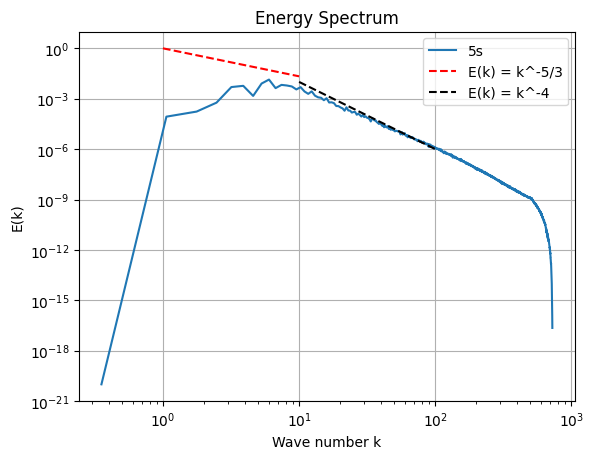

In [83]:
test_file = '../proceed_data/proceed_data_v_given/processed_data_u/5_ux_uy_data.txt'
plt.figure()
velocity_plotting(test_file)
compared_line()
plt.legend()
plt.xlabel('Wave number k')
plt.ylabel('E(k)')
plt.title('Energy Spectrum')
plt.grid(True)
plt.show()

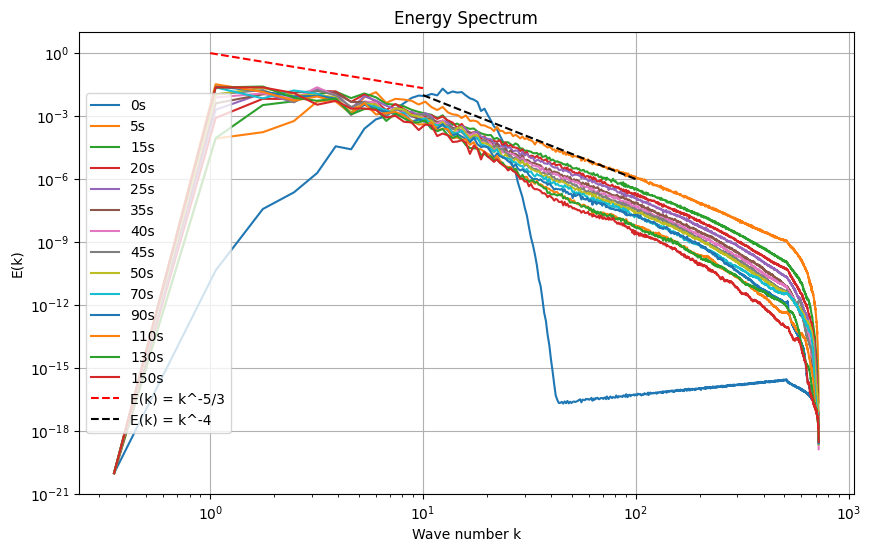

In [84]:
plt.figure(figsize=(10,6))
N = 1024
for file in files:
    velocity_plotting(file)

compared_line()
plt.xlabel('Wave number k')
plt.ylabel('E(k)')
plt.title('Energy Spectrum')
plt.legend()
plt.grid(True)
plt.show()

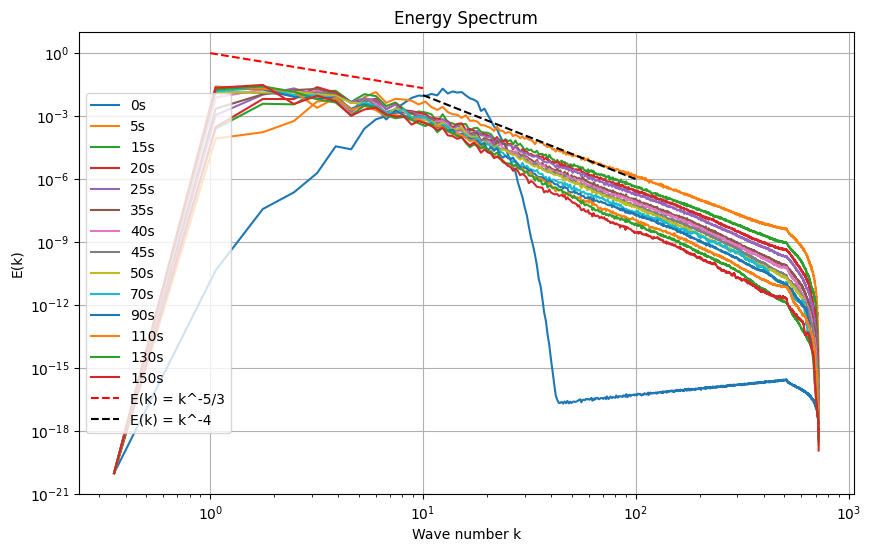

In [133]:
plt.figure(figsize=(10,6))
for file in files3:
    velocity_plotting(file) 
compared_line()
plt.xlabel('Wave number k')
plt.ylabel('E(k)')
plt.title('Energy Spectrum')
plt.legend()
plt.grid(True)
plt.show()

# ek1 = []
# ek3 = []
# ek4 = []
# for file1, file3 in zip(files, files3):
#     k1, ek1 = get_ek(file1)
#     k3, ek3 = get_ek(file3)
#     ek4.append(ek1-ek3)
#     plt.figure()
#     ek4 = [abs(ek4) for ek4 in ek4]
#     plt.plot(k1, ek4[0])
#     plt.show()
#     print(ek4)
#     ek4=[]


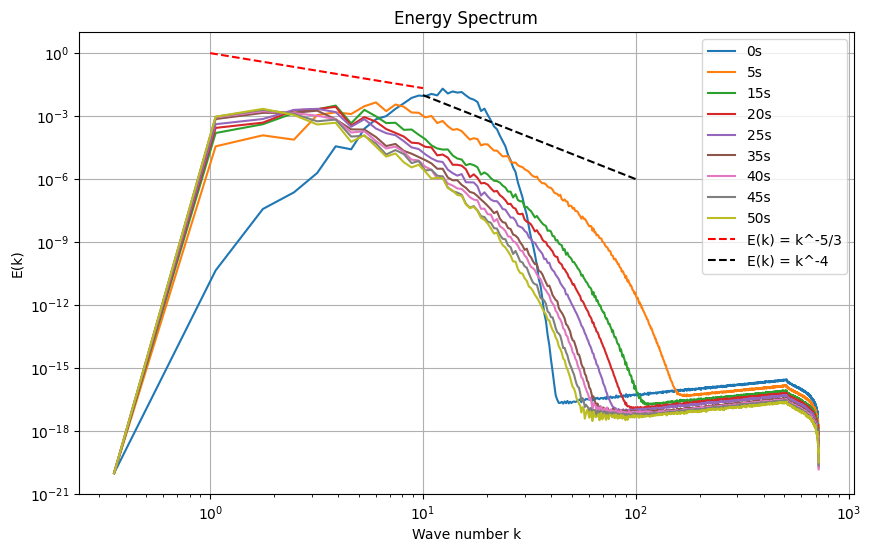

In [85]:
plt.figure(figsize=(10,6))
N = 1024
for file in files2:
    velocity_plotting(file) 
compared_line()
plt.xlabel('Wave number k')
plt.ylabel('E(k)')
plt.title('Energy Spectrum')
plt.legend()
plt.grid(True)
plt.show()

## Cal. Dissp. rate ##

In [115]:
def dissp_rate(ux, nu):
    L = 6.283
    grid_size = 1024
    dx = L/grid_size
    nu = nu  # given:0.00001
    
    ux = ux.reshape((grid_size, grid_size))
    
    ux_prime = ux - np.mean(ux)
    
    duxdx = (np.roll(ux_prime, -1, axis=1) - np.roll(ux_prime, 1, axis=1)) / (2 * dx)
    duxdy = (np.roll(ux_prime, -1, axis=0) - np.roll(ux_prime, 1, axis=0)) / (2 * dx)
    
    epsilon = 0.5 * nu * np.mean(duxdx**2 + duxdy**2)
    print(f"ε: {epsilon:.6e} m²/s³")
    return epsilon

ε: 7.671993e-05 m²/s³
ε: 2.827554e-05 m²/s³
ε: 1.254915e-05 m²/s³
ε: 9.027902e-06 m²/s³
ε: 7.649634e-06 m²/s³
ε: 5.781600e-06 m²/s³
ε: 5.885801e-06 m²/s³
ε: 5.516056e-06 m²/s³
ε: 5.050336e-06 m²/s³
ε: 3.902053e-06 m²/s³
ε: 3.301975e-06 m²/s³
ε: 3.204711e-06 m²/s³
ε: 2.550474e-06 m²/s³
ε: 2.161404e-06 m²/s³


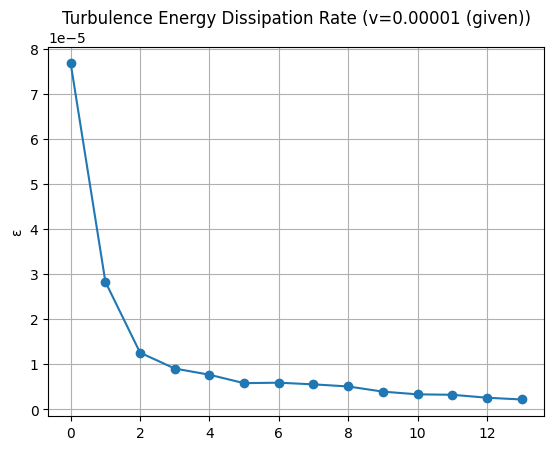

In [117]:
eps1 = np.array([])
for file in files:
    ux, uy = sep(file)
    epsilon = dissp_rate(ux, 0.00001)
    eps1 = np.append(eps1, epsilon)
plt.plot(range(len(eps1)), eps1, marker='o', linestyle='-')
plt.ylabel("ε")
plt.title("Turbulence Energy Dissipation Rate (v=0.00001 (given))")
plt.grid(True)
plt.show()

ε: 7.671993e-04 m²/s³
ε: 4.561127e-05 m²/s³
ε: 7.396848e-06 m²/s³
ε: 4.826637e-06 m²/s³
ε: 3.285473e-06 m²/s³
ε: 1.785731e-06 m²/s³
ε: 1.266266e-06 m²/s³
ε: 8.941828e-07 m²/s³
ε: 6.822461e-07 m²/s³


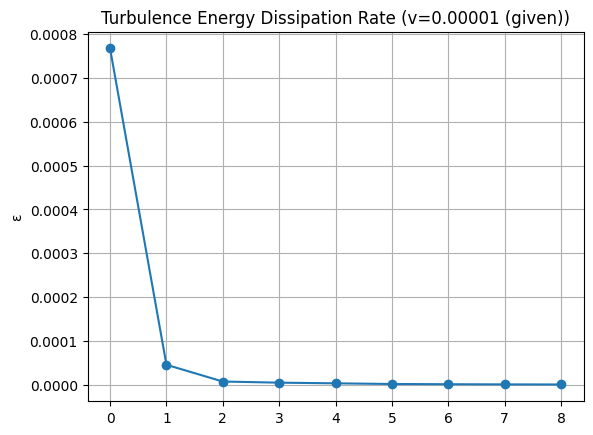

array([7.67199346e-04, 4.56112681e-05, 7.39684841e-06, 4.82663720e-06,
       3.28547255e-06, 1.78573078e-06, 1.26626633e-06, 8.94182810e-07,
       6.82246058e-07])

In [118]:
eps2 = np.array([])
for file in files2:
    ux,  uy = sep(file)
    epsilon = dissp_rate(ux, 0.0001)
    eps2 = np.append(eps2, epsilon)
plt.plot(range(len(eps2)), eps2, marker='o', linestyle='-')
plt.ylabel("ε")
plt.title("Turbulence Energy Dissipation Rate (v=0.00001 (given))")
plt.grid(True)
plt.show()
eps2

Text(0.5, 1.0, 'eps: v(given) - v(10 times)')

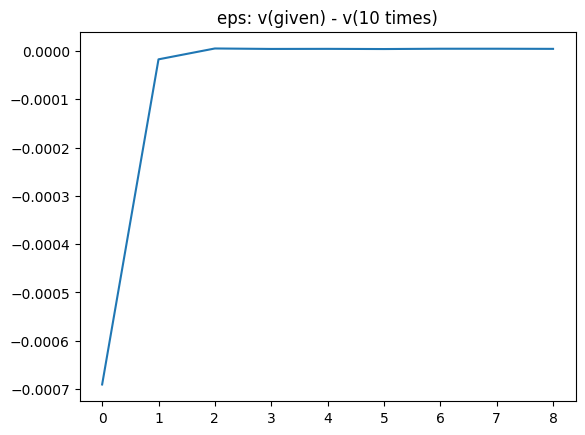

In [122]:
eps = eps1[0:9]-eps2
plt.plot(range(len(eps)), eps)
plt.title("eps: v(given) - v(10 times)")

## enstrophy_diss ##

In [93]:
def enstrophy_diss(omega, nu):
    dx = 6.283 / 1024

    if omega.ndim == 1:
        size = int(np.sqrt(omega.size))
        omega = omega.reshape((size, size))
    # ∇ω
    domega_dx = (np.roll(omega, -1, axis=1) - np.roll(omega, 1, axis=1)) / (2 * dx)
    domega_dy = (np.roll(omega, -1, axis=0) - np.roll(omega, 1, axis=0)) / (2 * dx)
    
    # |∇ω|²
    grad_omega_squared = domega_dx**2 + domega_dy**2

    zeta = nu * np.mean(grad_omega_squared)
    
    return zeta
    
def kd_2d(zeta, nu):
    kd = (zeta/(nu)**3)**(1/6)
    return kd

In [98]:
DataNum = len(files_vor)

zeta1 = np.array([])

for file in files_vor:
    data = get_vorticity(file)
    nu = 0.00001 #given
    # nu = 0.0001 #10 times
    zeta_value = enstrophy_diss(data, nu)
    zeta1 = np.append(zeta1, zeta_value)
    
print(zeta1)

[0.03534797 0.32317932 0.08686154 0.04917965 0.03206274 0.0185367
 0.01384817 0.01069213 0.00871733 0.00586066 0.00479748 0.00251733
 0.00218627 0.001437  ]


In [99]:
kd1 = kd_2d(zeta1, 0.00001)
kd1

array([181.15934457, 261.96338522, 210.44466459, 191.40983001,
       178.23791979, 162.68170885, 154.96445132, 148.42625012,
       143.45992142, 134.27375764, 129.86802246, 116.63353432,
       113.92455512, 106.22886781])

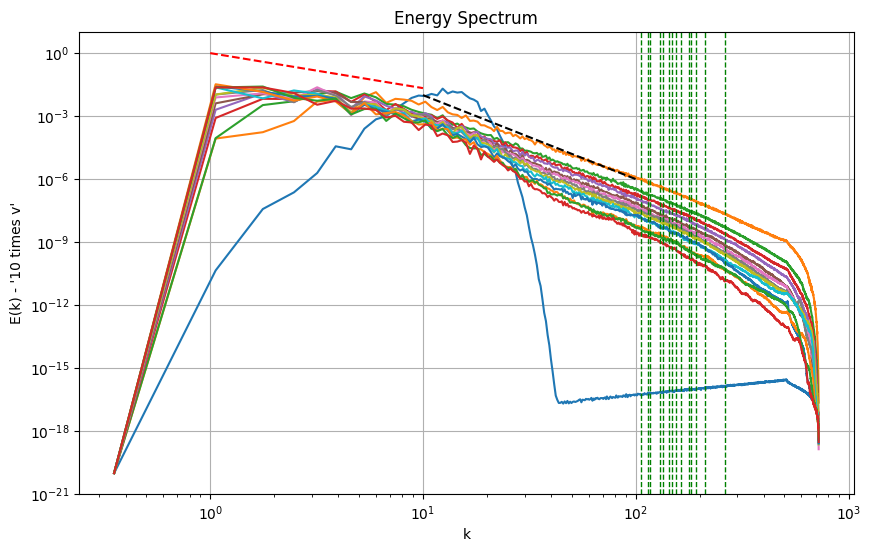

In [100]:
plt.figure(figsize=(10, 6))
for file in files:
    velocity_plotting(file)

for x in kd1:
    plt.axvline(x=x, color='g', linestyle='--', linewidth=1, label=f"x = {x}")
    
compared_line()
plt.xlabel("k")
plt.ylabel("E(k) - '10 times v'")
plt.title("Energy Spectrum")
#plt.legend()
plt.grid(True)
plt.show()

## compute palinstrophy ##

compute: [[ 0.71122142  0.68514548  0.69019769 ...  0.13494302  0.53879423
   0.71154737]
 [ 0.74292     0.70714706  0.69622775 ...  0.01051187  0.44736545
   0.65165418]
 [ 0.78235986  0.74430528  0.71741446 ... -0.09851818  0.35422543
   0.58312334]
 ...
 [ 0.61848884  0.63071194  0.63429738 ...  0.47621196  0.67960434
   0.70771747]
 [ 0.63372697  0.63731241  0.65654342 ...  0.37117479  0.65621748
   0.7325711 ]
 [ 0.65124675  0.64187571  0.66192159 ...  0.24812892  0.60056163
   0.7216518 ]]
test: ../proceed_data/proceed_data_v_given/processed_data_u/50_ux_uy_data.txt
Calculated Palinstrophy: 79.056120


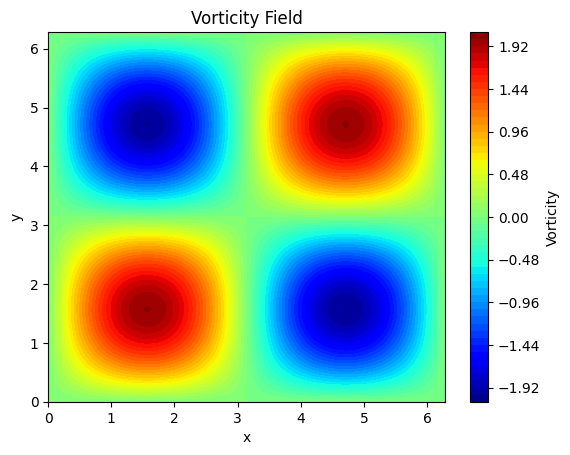

In [37]:
# Example usage
nx, ny = 1024, 1024  # Grid size
Lx, Ly = 2 * np.pi, 2 * np.pi  # Domain size
dx, dy = Lx / nx, Ly / ny
N=1024
def compute_vorticity(u, v, dx, dy):
    """
    Calculate the vorticity ω = (dv/dx - du/dy)
    :param u: 2D array of x-direction velocity
    :param v: 2D array of y-direction velocity
    :param dx: Grid spacing in x-direction
    :param dy: Grid spacing in y-direction
    :return: 2D array of vorticity
    """

    dudy, dudx = np.gradient(u, dy, dx)
    dvdy, dvdx = np.gradient(v, dy, dx)
    vorticity = dvdx - dudy
    return vorticity

test_data = '../proceed_data/proceed_data_v_given/processed_data_u/50_ux_uy_data.txt'
test_data2 = '../proceed_data/proceed_data_v_given/processed_data_vor/50_vor_data.txt'

ux, uy = sep(test_data)
ux_2d = ux.reshape((N, N))
uy_2d = uy.reshape((N, N))
vorticity123 = compute_vorticity(ux_2d, uy_2d, dx, dy)
print(f"compute: {vorticity123}")
print(f"test: {test_data}")

def compute_palinstrophy(vorticity, dx, dy):
    """
    Calculate the palinstrophy = integral (grad(ω))^2 dA
    :param vorticity: 2D array of vorticity field
    :param dx: Grid spacing in x-direction
    :param dy: Grid spacing in y-direction
    :return: palinstrophy value
    """
    dωdy, dωdx = np.gradient(vorticity, dy, dx)
    grad_omega_squared = dωdx**2 + dωdy**2
    palinstrophy = np.sum(grad_omega_squared) * dx * dy
    return palinstrophy



# Example velocity field (Taylor-Green vortex)
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
X, Y = np.meshgrid(x, y)

u = np.sin(X) * np.cos(Y)  # Example u-component velocity
v = -np.cos(X) * np.sin(Y)  # Example v-component velocity

# Compute vorticity and palinstrophy
vorticity = compute_vorticity(u, v, dx, dy)
palinstrophy_value = compute_palinstrophy(vorticity, dx, dy)

print(f"Calculated Palinstrophy: {palinstrophy_value:.6f}")

# Visualize vorticity field
plt.contourf(X, Y, vorticity, levels=50, cmap='jet')
plt.colorbar(label="Vorticity")
plt.title("Vorticity Field")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## compute_stress_spectrum ##

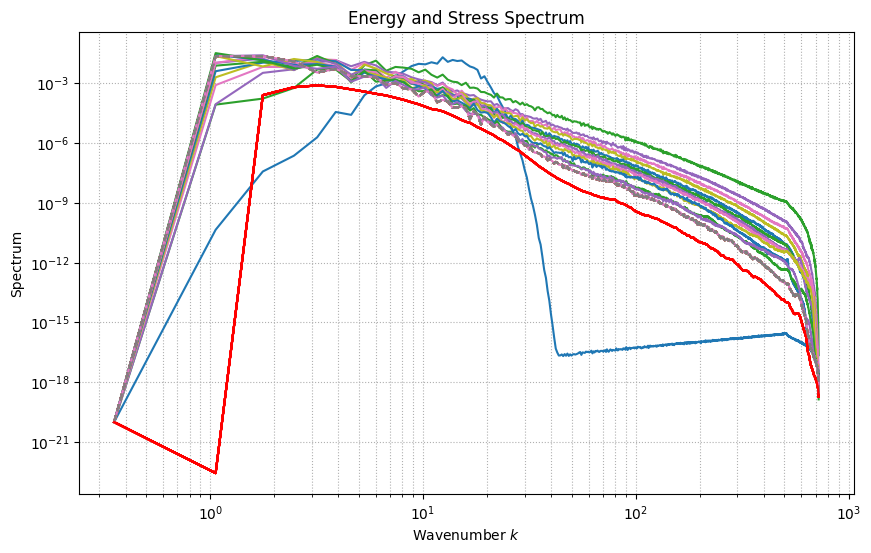

In [101]:
from scipy import integrate

def compute_stress_spectrum(k_vals, E_k):
    """
    Compute the stress spectrum F(k) using the convolution integral of E(k)
    :param k_vals: Array of wavenumbers
    :param E_k: Corresponding energy spectrum values
    :return: Stress spectrum F(k)
    """
    F_k = np.zeros_like(E_k)

    for i, k in enumerate(k_vals):
        integrand = E_k * np.interp(k - k_vals, k_vals, E_k, left=0, right=0)
        F_k[i] = integrate.simpson(integrand, k_vals)

    return F_k

plt.figure(figsize=(10, 6))

# Define wavenumber range
for file in files:
    velocity_plotting(file)
    # Compute stress spectrum
    F_k = compute_stress_spectrum(k_array, Ek_array)
    F_k[0] = 10e-21
    plt.loglog(k_array, Ek_array, linestyle='--')
    plt.loglog(k_array, F_k, color='r')

# Plot results
plt.xlabel('Wavenumber $k$')
plt.ylabel('Spectrum')
plt.title('Energy and Stress Spectrum')
plt.grid(True, which="both", linestyle=":")
plt.show()


## Three dimensional forced case ##

In [54]:
def kom_scale(eps, nu):
    eta = ((nu**3)/eps)**(1/4)

    return eta
def kd_range(eps, nu):
    kd = (eps**(1/4))/(nu**(3/4))
    return kd

In [55]:
eta1 = kom_scale(eps1, 0.00001)
kd1 = kd_range(eps1, 0.00001)
kd1

array([62776.25093289, 55568.45726086, 40227.71931464, 36777.3567616 ,
       34568.63162339, 31528.28053664, 30424.61721481, 29568.39684179,
       28876.86792679, 26526.67508428, 24829.82314252, 23530.4480792 ,
       22479.10274707, 21389.83560655])

In [56]:
eta2 = kom_scale(eps2, 0.0001)
kd2 = kd_range(eps2, 0.0001)
kd2

array([10808.43827972,  4954.16852661,  2538.80793936,  2089.30534648,
        1802.04056934,  1429.19726493,  1300.44440456,  1196.99165906,
        1109.23942124])

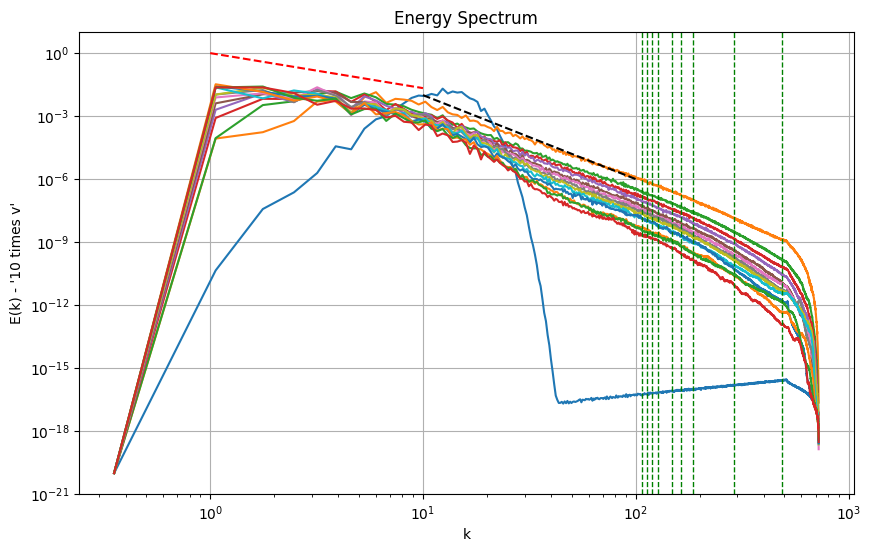

In [104]:
plt.figure(figsize=(10, 6))
for file in files:
    velocity_plotting(file)    

for x in kd2:
    plt.axvline(x=x, color='g', linestyle='--', linewidth=1, label=f"x = {x}")
    
compared_line()

plt.xlabel("k")
plt.ylabel("E(k) - '10 times v'")
plt.title("Energy Spectrum")
plt.grid(True)
plt.show()

## Two dimension forced decay ##

In [48]:
from scipy.ndimage import sobel

def cal_enstrophy(data, label, visualize=False):
    
    L = 6.283
    grid_size = 1024
    dx = L/grid_size
    dy = dx
    
    vorticity = data.reshape((1024, 1024))
    
    # dux_dx = sobel(ux, axis=1, mode='wrap') / (2.0 * dx) #diff
    # dux_dy = sobel(ux, axis=0, mode='wrap') / (2.0 * dy) #diff

    # duy_dx = dux_dx
    # duy_dy = dux_dy

    # vorticity = duy_dx - dux_dy

    # ∫ |ω|^2 dA
    enstrophy = np.sum(vorticity**2) * (dx * dy)

    if visualize:
        plt.figure(figsize=(6, 5))
        plt.imshow(vorticity, cmap='coolwarm', origin='lower')
        plt.colorbar(label='Vorticity')
        #plt.title(f"Vorticity Field, t={label}")
        plt.title(f"Vorticity Field")
        plt.xlabel("X-axis")
        plt.ylabel("Y-axis")
        plt.grid(False)
        plt.show()

    return enstrophy

In [107]:
ens1 = np.array([])
ens2 = np.array([])

for file in files_vor:
    data, label = get_vorticity(file)
    ens1_1 = cal_enstrophy(data, label, visualize=False)
    ens1 = np.append(ens1, ens1_1)

for file in files2_vor:
    data, label = get_vorticity(file)
    ens2_2 = cal_enstrophy(data, label, visualize=False)
    ens2 = np.append(ens2, ens2_2)
print(f"Calculated Enstrophy(given): {ens1}")
print(f"Calculated Enstrophy(10 times): {ens2}")

Calculated Enstrophy(given): [622.47369241 449.65100924 189.99161302 149.58269969 126.80970814
  99.20512223  90.21255735  83.60021779  78.48745206  62.58748703
  52.47224792  45.46534869  40.24796497  35.25493011]
Calculated Enstrophy(10 times): [571.08557667  71.32723724  11.99535008   7.13408766   4.8088235
   2.59166663   2.01485953   1.61526208   1.31846151]


In [61]:
eps1 = ens1**(3/2)
nu1 = 0.0001
Ld1 = (nu1**3/eps1)**(1/6)
kd1 = Ld1**(-1)
kl1 = kd1 - Ld1
print(kd1)

eps2 = ens2**(3/2)
nu2 = 0.0001
Ld2 = (nu2**3/eps2)**(1/6)
kd2 = Ld2**(-1)
kl2 = kd2 - Ld2
print(kd2)

[499.4939708  460.4886106  371.26465656 349.71989699 335.57386174
 315.59747808 308.18872675 302.37915719 297.64600491 281.26900613
 269.14258385 259.6690156  251.87553247 243.67162779]
[488.84963803 290.61220566 186.10293906 163.43106485 148.08453616
 126.88047162 119.14098699 112.73551404 107.15609133]


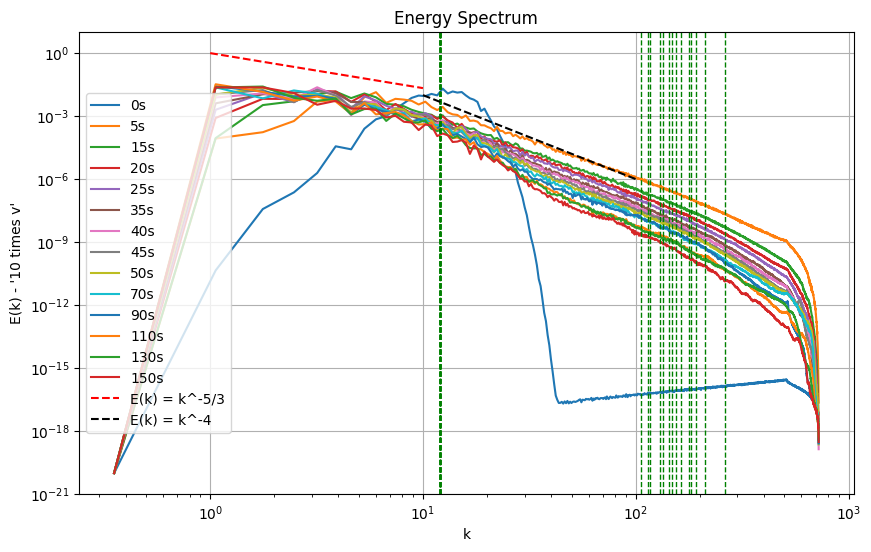

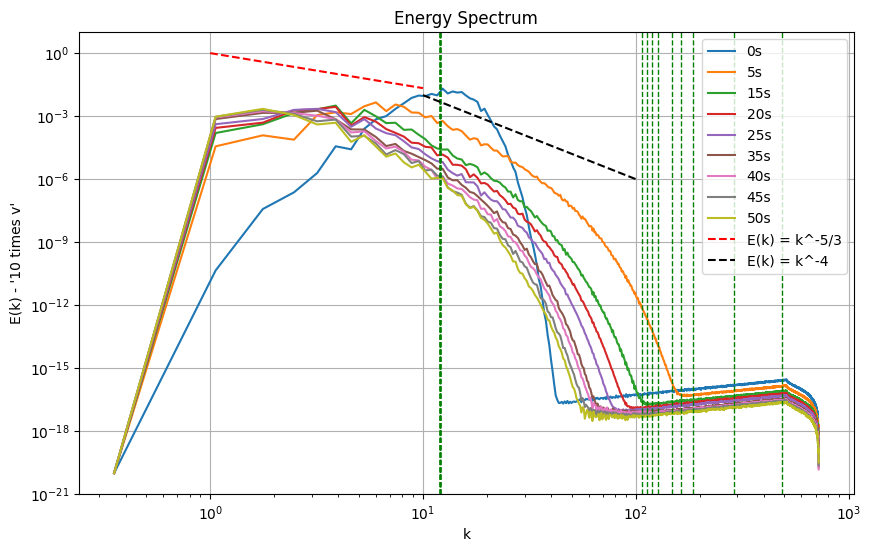

In [109]:
plt.figure(figsize=(10, 6))
for file in files:
    velocity_plotting(file)

for x in kd1:
    plt.axvline(x=x, color='g', linestyle='--', linewidth=1)#, label=f"x = {x}")
    plt.axvline(x=12, color='g', linestyle='--', linewidth=1)
    
compared_line()

plt.xlabel("k")
plt.ylabel("E(k) - '10 times v'")
plt.title("Energy Spectrum")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
for file in files2:
    velocity_plotting(file)

for x in kd2:
    plt.axvline(x=x, color='g', linestyle='--', linewidth=1)#, label=f"x = {x}")
    plt.axvline(x=12, color='g', linestyle='--', linewidth=1)
    
compared_line()

plt.xlabel("k")
plt.ylabel("E(k) - '10 times v'")
plt.title("Energy Spectrum")
plt.legend()
plt.grid(True)
plt.show()

## Two dimension freely decay ##

In [63]:
def kdiss(time, nu):
    L_diss = np.sqrt(nu*time)
    k_diss = 1/L_diss
    
    return k_diss

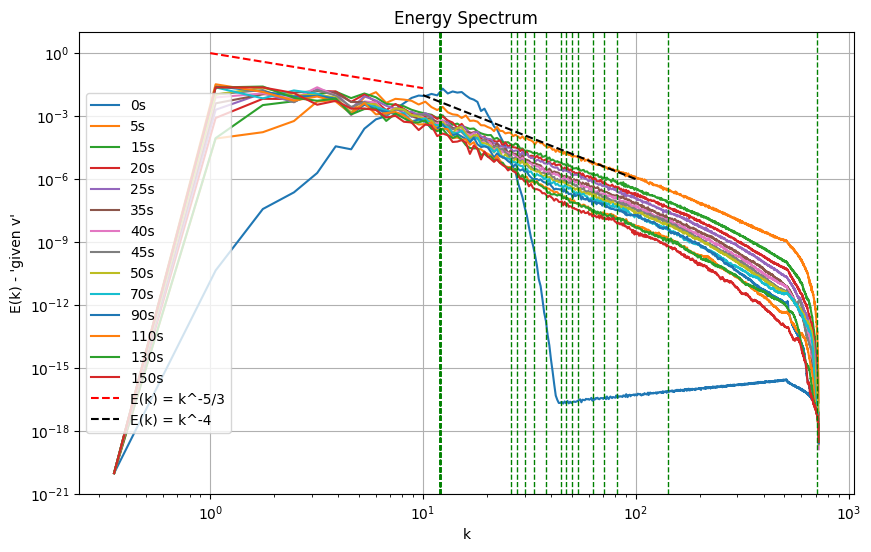

In [111]:
plt.figure(figsize=(10, 6))
kdiss1 = np.array([])
for file in files_vor:
    data, label = get_vorticity(file)
    kdiss1_1 = kdiss(float(label), 0.00001)
    kdiss1 = np.append(kdiss1, kdiss1_1) 
    
for file in files:
    velocity_plotting(file)

for x in kdiss1:
    plt.axvline(x=x, color='g', linestyle='--', linewidth=1)#, label=f"x = {x}")
    plt.axvline(x=12, color='g', linestyle='--', linewidth=1)
    
compared_line()

plt.xlabel("k")
plt.ylabel("E(k) - 'given v'")
plt.title("Energy Spectrum")
plt.legend()
plt.grid(True)
plt.show()

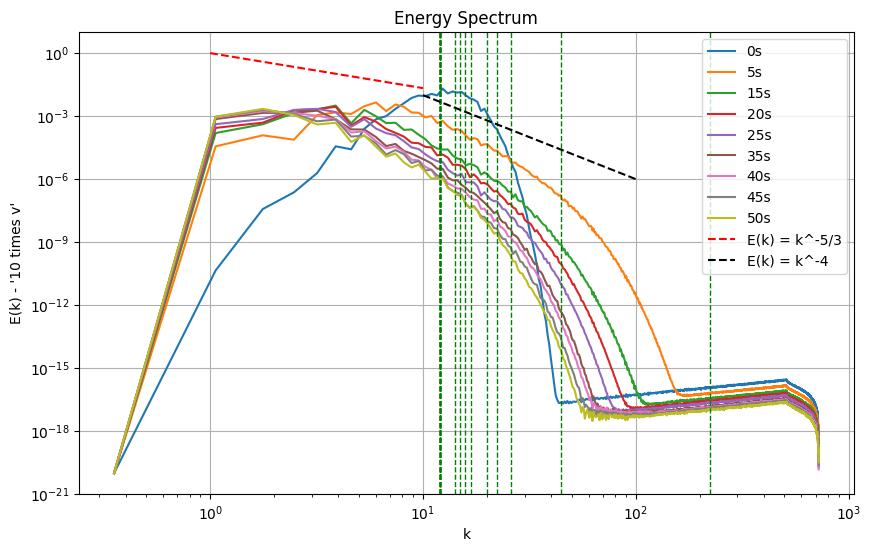

In [113]:
plt.figure(figsize=(10, 6))
kdiss2 = np.array([])
for file in files2_vor:
    data, label = get_vorticity(file)
    kdiss2_2 = kdiss(float(label), 0.0001)
    kdiss2 = np.append(kdiss2, kdiss2_2) 
    
for file in files2:
    velocity_plotting(file)

for x in kdiss2:
    plt.axvline(x=x, color='g', linestyle='--', linewidth=1)#, label=f"x = {x}")
    plt.axvline(x=12, color='g', linestyle='--', linewidth=1)
    
compared_line()

plt.xlabel("k")
plt.ylabel("E(k) - '10 times v'")
plt.title("Energy Spectrum")
plt.legend()
plt.grid(True)
plt.show()